## Load libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout
from sklearn.metrics import r2_score

## Load the dataset

In [2]:
# Reading Of Data
data = pd.read_csv("Litecoin.csv",index_col=0)

In [3]:
# Sorting Of Data yearly wise
data=data[::-1].reset_index(drop=True)
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,Apr 28 2013,4.30,4.40,4.18,4.35,0,74636938
1,Apr 29 2013,4.37,4.57,4.23,4.38,0,75388964
2,Apr 30 2013,4.40,4.57,4.17,4.30,0,74020918
3,May 01 2013,4.29,4.36,3.52,3.80,0,65604596
4,May 02 2013,3.78,4.04,3.01,3.37,0,58287979
...,...,...,...,...,...,...,...
2950,May 26 2021,183.98,204.09,180.02,199.22,4409113332,13298705180
2951,May 27 2021,199.24,208.46,181.09,193.12,4104509375,12891299486
2952,May 28 2021,193.99,198.49,166.20,177.32,4842770593,11836582264
2953,May 29 2021,177.38,188.61,158.04,163.81,4442221955,10934586487


# Data Preprocessing

In [4]:
data.isna().any()

Date          False
Open          False
High          False
Low           False
Close         False
Volume        False
Market Cap    False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2955 non-null   object 
 1   Open        2955 non-null   float64
 2   High        2955 non-null   float64
 3   Low         2955 non-null   float64
 4   Close       2955 non-null   float64
 5   Volume      2955 non-null   int64  
 6   Market Cap  2955 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 161.7+ KB


In [6]:
# Conversion Into DateTime
data['Date'] = pd.to_datetime(data['Date'])
df=data

In [7]:
print("Years : ",df["Date"].dt.year.unique())

Years :  [2013 2014 2015 2016 2017 2018 2019 2020 2021]


In [8]:
data=df.loc[data["Date"].dt.year.eq(2017)]

In [9]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
1344,2017-01-01,4.33,4.52,4.33,4.51,11337500,221718275
1345,2017-01-02,4.52,4.74,4.48,4.65,14595300,228536448
1346,2017-01-03,4.66,4.73,4.56,4.63,10055700,227483921
1347,2017-01-04,4.63,4.84,4.63,4.84,13762400,237966484
1348,2017-01-05,4.91,4.95,4.23,4.29,19196000,211212252
...,...,...,...,...,...,...,...
1704,2017-12-27,286.59,290.94,264.42,272.17,777137984,14833811828
1705,2017-12-28,272.13,273.18,231.38,249.93,2593240064,13625185918
1706,2017-12-29,250.35,258.04,238.33,245.50,1392210048,13387459289
1707,2017-12-30,245.09,245.43,208.20,218.96,943667008,11943513791


In [10]:
data.describe()

,Open,High,Low,Close,Volume,Market Cap
count,365.000000,365.000000,365.000000,365.000000,3.650000e+02,3.650000e+02
mean,49.445781,52.578630,46.510986,50.031863,3.331996e+08,2.665382e+09
std,64.014411,69.181368,58.684635,64.575977,6.013594e+08,3.519836e+09
min,3.710000,3.770000,3.610000,3.710000,2.629220e+06,1.838773e+08
25%,7.020000,7.940000,6.650000,7.740000,4.392910e+07,3.907955e+08
50%,42.220000,43.610000,40.350000,42.230000,1.592550e+08,2.203568e+09
75%,55.670000,56.670000,53.950000,55.740000,3.550360e+08,2.984809e+09
max,359.130000,375.290000,335.670000,358.340000,6.961680e+09,1.948262e+10


# Monthly Analysis Of Coin

In [11]:
font = {
        'size'   : 13}

plt.rc('font', **font)

plt.rc('xtick', labelsize=13) 

In [12]:
# Sort by date to cater discontinue values
df=df.sort_values(by=['Date'])

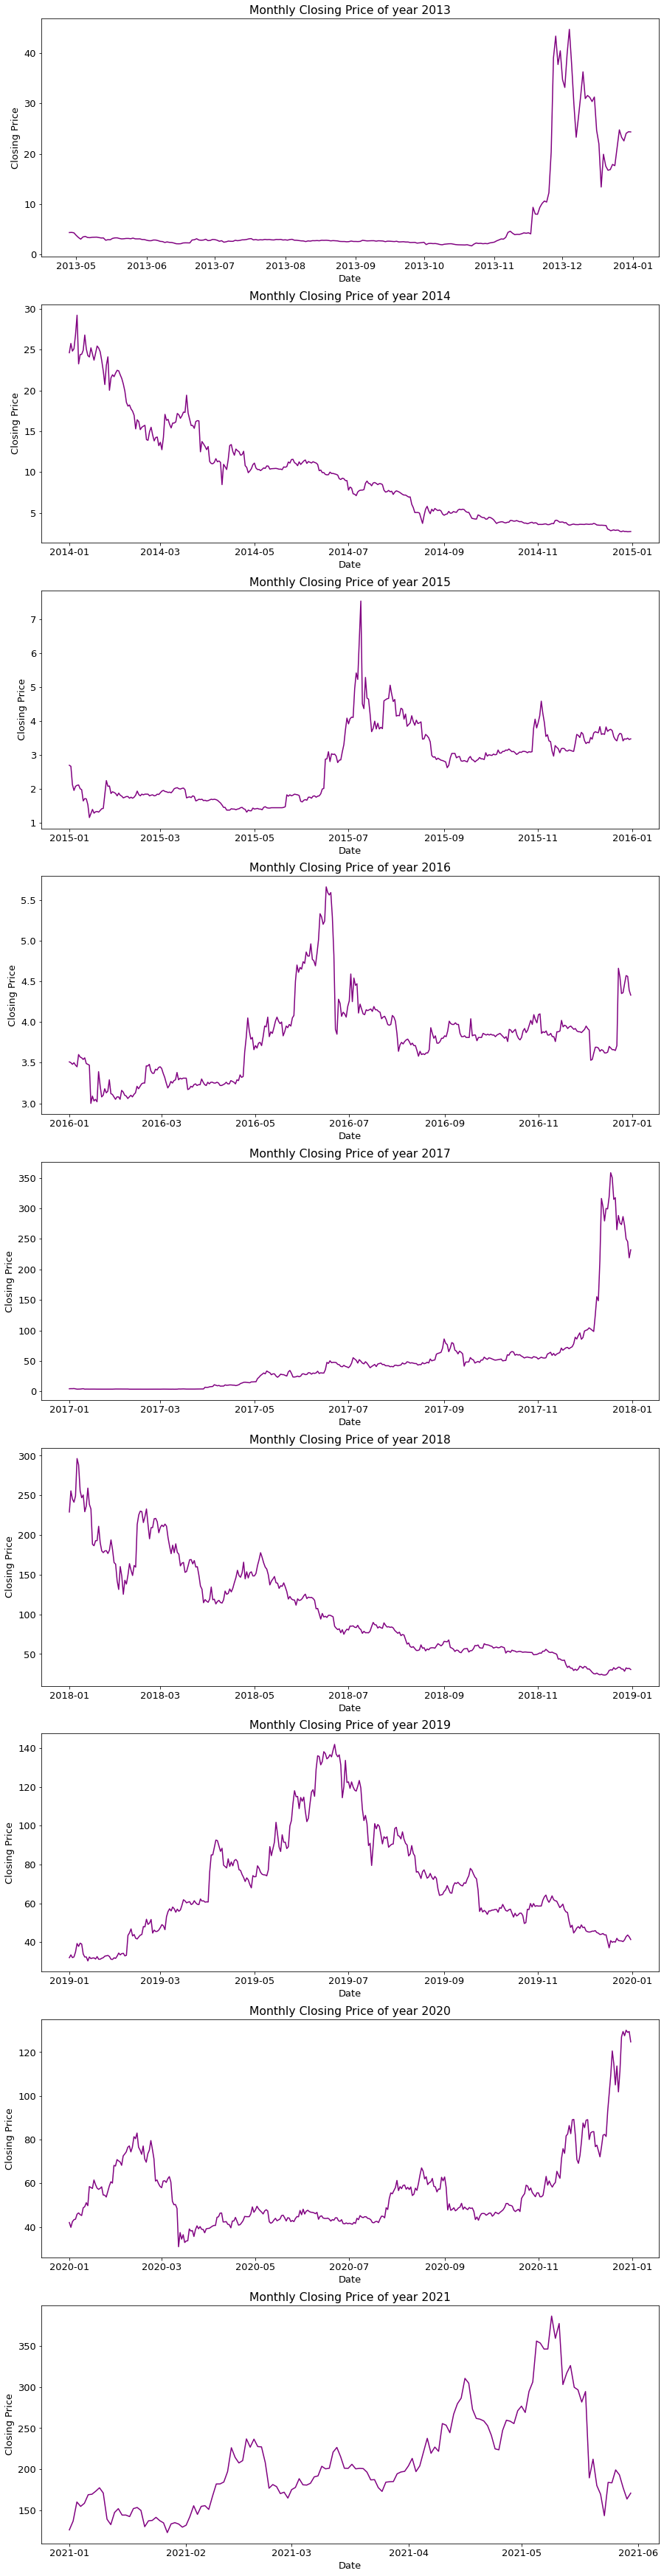

In [13]:
NoOfYears=len(df["Date"].dt.year.unique())

plt.figure(figsize=(15,NoOfYears*7)) 

ix=1

for year in range(NoOfYears):
    
    year=year+df["Date"].dt.year[0]
    
    data=df.loc[df["Date"].dt.year.eq(year)]
    
    ax = plt.subplot( NoOfYears,1, ix)
    
    ax.plot(data['Date'].values,data['Close'],color='purple')
    ax.set(xlabel="Date",ylabel="Closing Price", title="Monthly Closing Price of year "+str(year))
    
    ix+=1
    
plt.show()

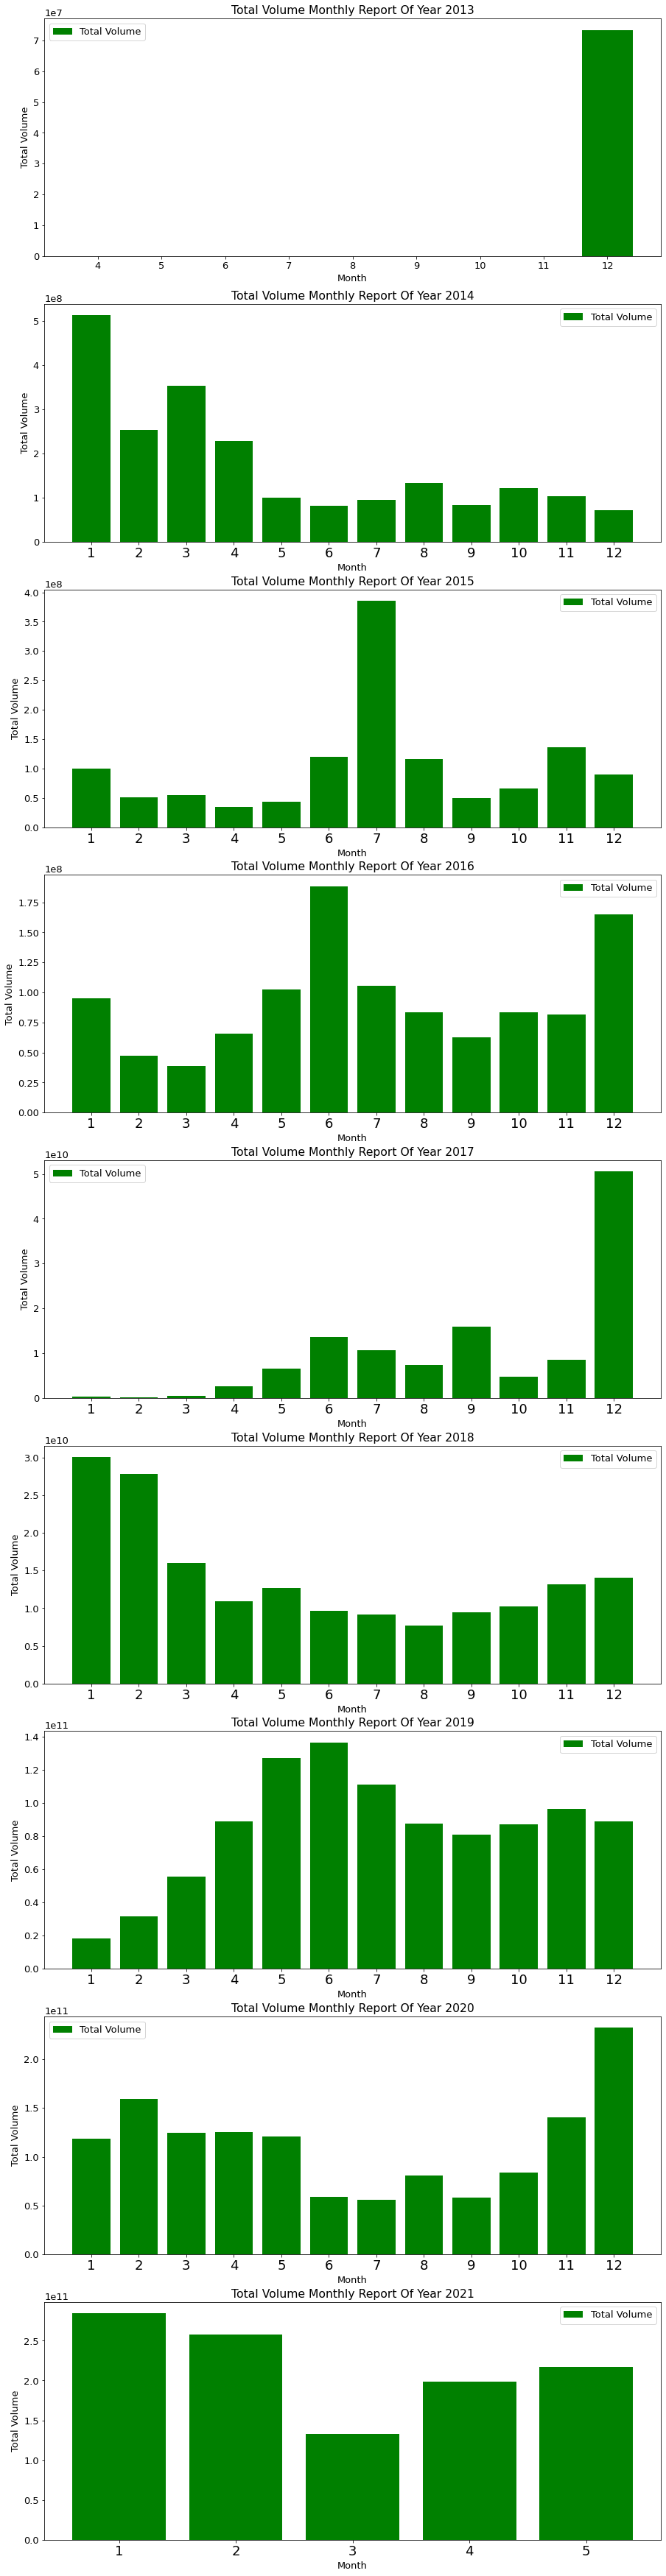

In [14]:
NoOfYears=len(df["Date"].dt.year.unique())

plt.figure(figsize=(15,NoOfYears*7)) 

ix=1

for year in range(NoOfYears):
    
    year=year+df["Date"].dt.year[0]
    
    data=df.loc[df["Date"].dt.year.eq(year)]
    
    ax = plt.subplot( NoOfYears,1, ix)
    
    ax.set_title('Total Volume Monthly Report Of Year '+ str(year))
    
    plt.rc('xtick', labelsize=18) 
    
    # Calculating Total Monthly Volume Values by grouping date accrding to month
    plotdata = pd.DataFrame({"Date": data["Date"].dt.month,"Total Volume":data["Volume"]})

    result=plotdata.groupby("Date").sum("Total Volume")
    
    ax.bar(result.index,result["Total Volume"],color='green' ,label="Total Volume")

    ax.legend()
    
    ax.set_xticks(result.index)
    ax.set_xticklabels(result.index)
    ax.set_xlabel("Month")

    ax.set_ylabel("Total Volume")

    
    ix+=1
    
plt.show()

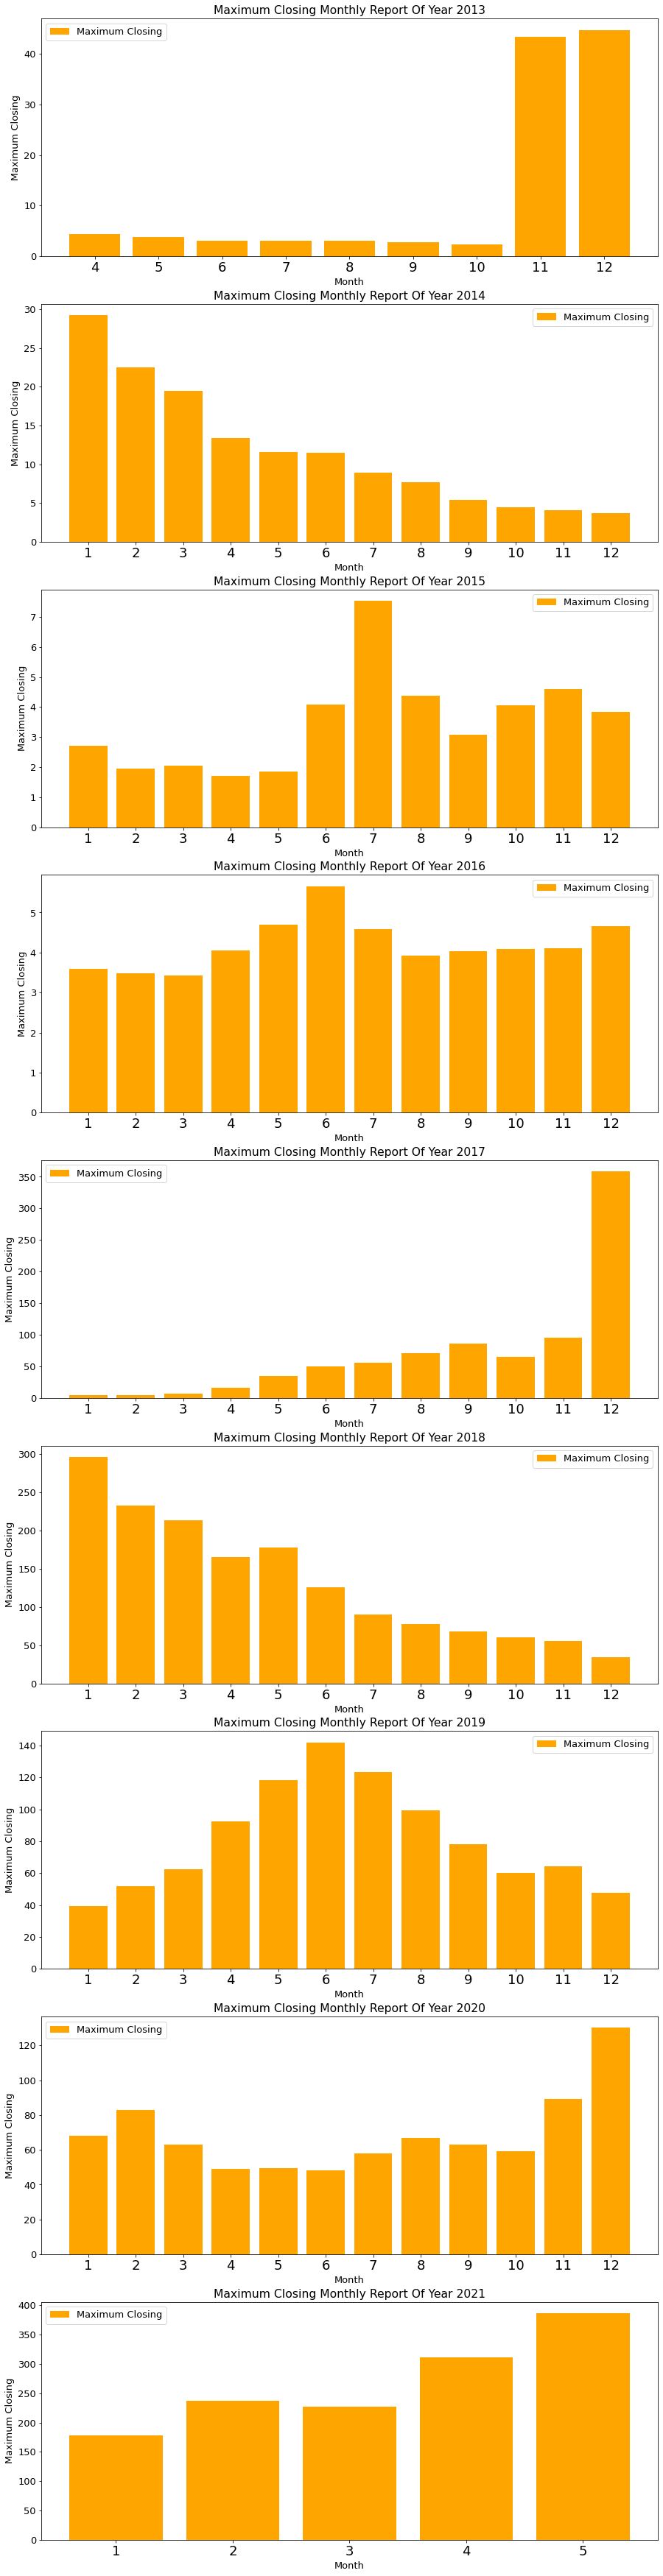

In [15]:
NoOfYears=len(df["Date"].dt.year.unique())

plt.figure(figsize=(15,NoOfYears*7)) 

ix=1

for year in range(NoOfYears):
    
    year=year+df["Date"].dt.year[0]
    
    data=df.loc[df["Date"].dt.year.eq(year)]
    
    ax = plt.subplot( NoOfYears,1, ix)
    
    ax.set_title('Maximum Closing Monthly Report Of Year '+ str(year))
    
    plt.rc('xtick', labelsize=18) 
    
    # Calculating Maximum Closing Value by grouping date accrding to month and then extracting max value
    plotdata = pd.DataFrame({"Date": data["Date"].dt.month,"Maximum Closing":data["Close"]})

    result=plotdata.groupby("Date").max("Maximum Closing")
    
    ax.bar(result.index,result["Maximum Closing"],color='orange' ,label="Maximum Closing")

    ax.legend()
    
    ax.set_xticks(result.index)
    ax.set_xticklabels(result.index)
    ax.set_xlabel("Month")

    ax.set_ylabel("Maximum Closing")

    
    ix+=1
    
plt.show()

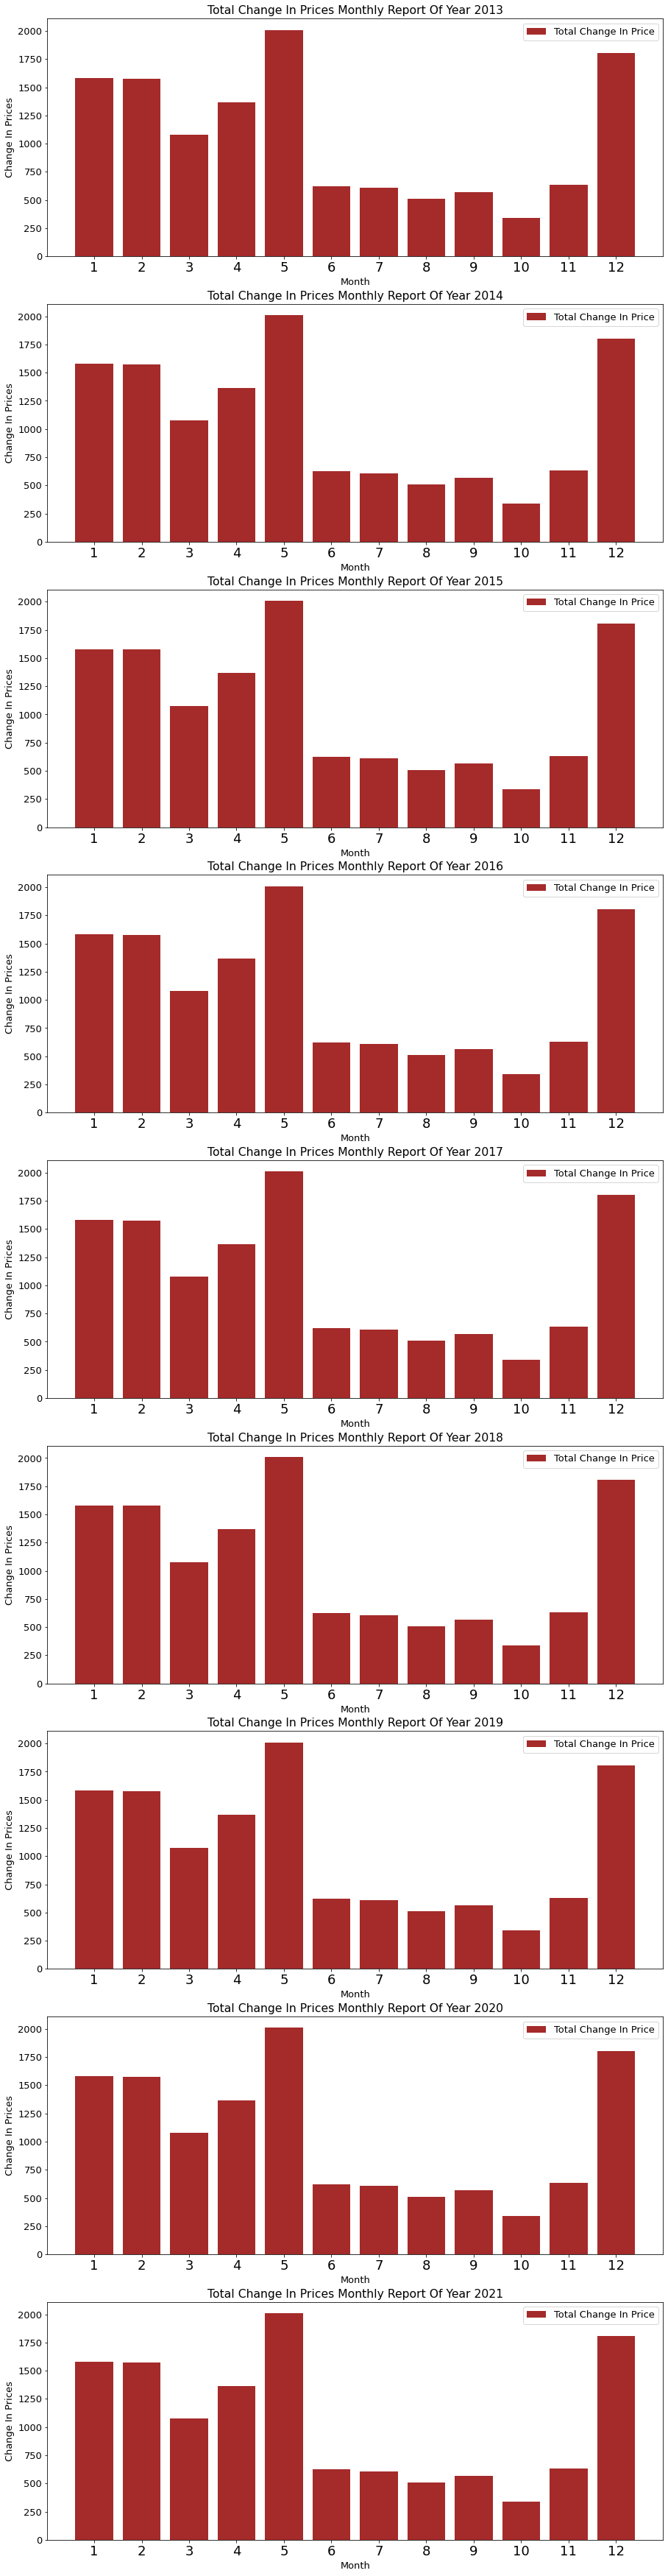

In [16]:
NoOfYears=len(df["Date"].dt.year.unique())

plt.figure(figsize=(15,NoOfYears*7)) 

ix=1

for year in range(NoOfYears):
    
    year=year+df["Date"].dt.year[0]
    
    data=df.loc[df["Date"].dt.year.eq(year)]
    
    ax = plt.subplot( NoOfYears,1, ix)
    
    ax.set_title('Total Change In Prices Monthly Report Of Year '+ str(year))
    
    plt.rc('xtick', labelsize=18) 
    
    # Calculating change in market price of coin monthly by difference between low and high

    plotdata = pd.DataFrame({"Date": df["Date"].dt.month,"Total Change In Price":abs(df["Low"]-df["High"])})

    result=plotdata.groupby("Date").sum("Total Change In Price")
    
    ax.bar(result.index,result["Total Change In Price"],color='brown' ,label="Total Change In Price")

    ax.legend()
    
    ax.set_xticks(result.index)
    ax.set_xticklabels(result.index)
    ax.set_xlabel("Month")

    ax.set_ylabel("Change In Prices")

    
    ix+=1
    
plt.show()

# Yearly Report Of Coin

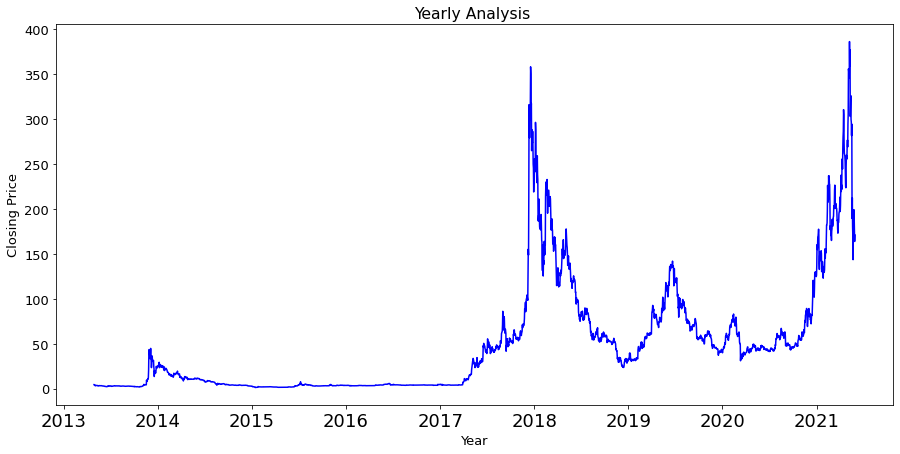

In [17]:
fig, ax = plt.subplots(figsize=(15,7))

df=df.sort_values(by=["Date"])

ax.plot(df['Date'].values,df['Close'],color='blue')

ax.set(xlabel="Year",ylabel="Closing Price", title="Yearly Analysis ")

plt.show()

Text(0, 0.5, 'Total Volume')

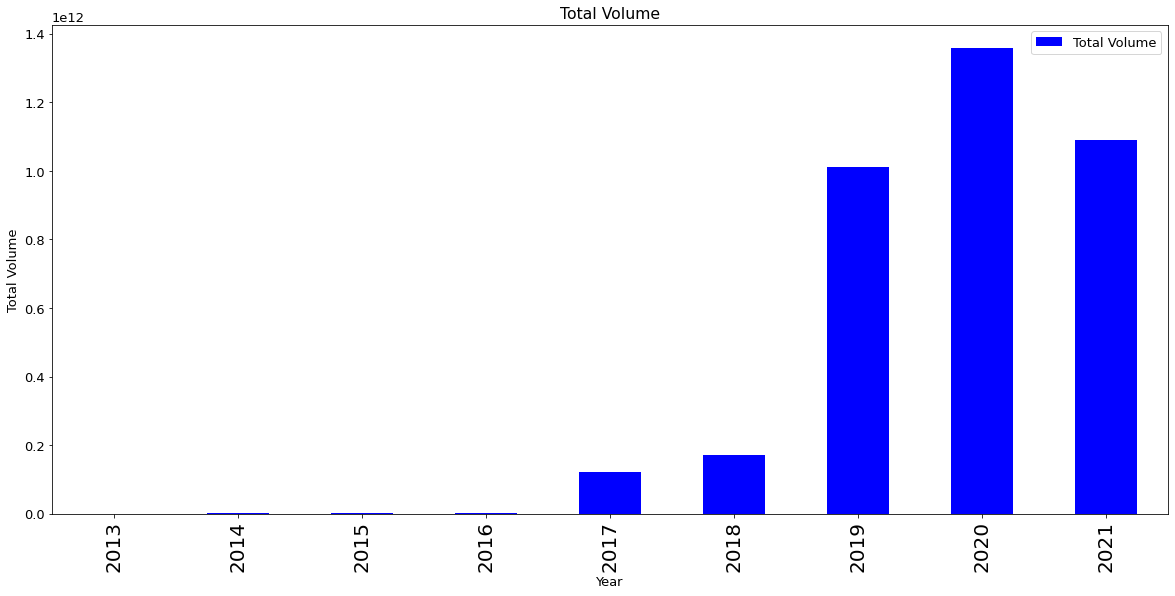

In [18]:
plt.rc('xtick', labelsize=20) 

plotdata = pd.DataFrame({"Date": df["Date"].dt.year,"Total Volume":df["Volume"]})

plotdata.groupby("Date").sum("Total Volume").plot(kind="bar",figsize=(20, 9),color='blue' , title="Total Volume")

plt.xlabel("Year")

plt.ylabel("Total Volume")

Text(0, 0.5, 'Change In Prices')

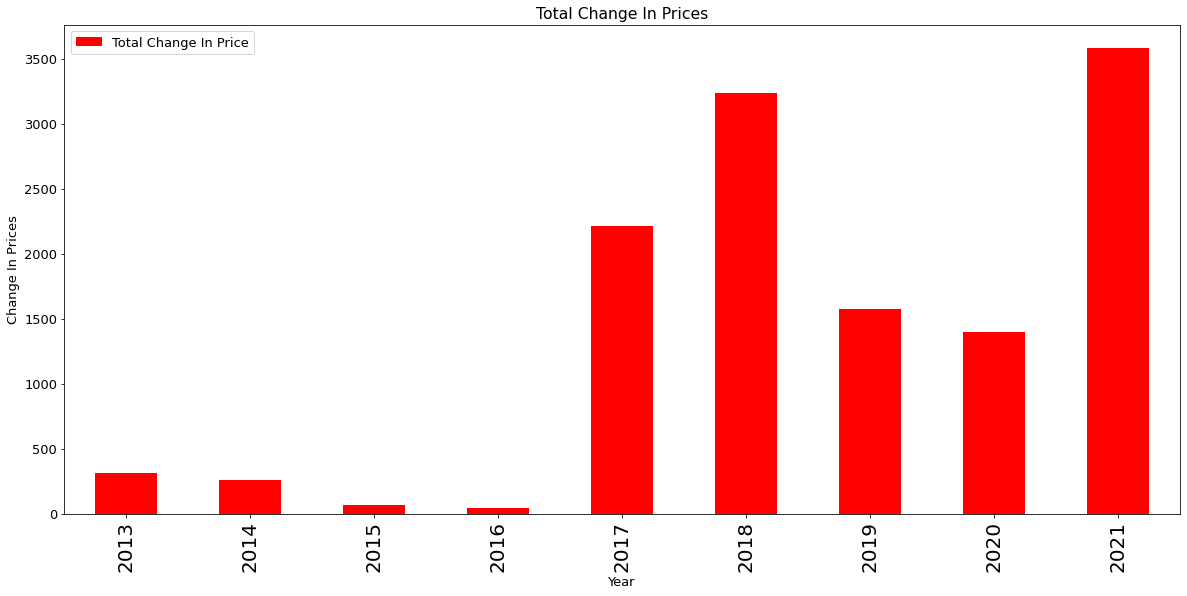

In [19]:
plt.rc('xtick', labelsize=20) 
plotdata = pd.DataFrame({"Date": df["Date"].dt.year,"Total Change In Price":abs(df["Low"]-df["High"])})
plotdata.groupby("Date").sum("Total Change In Price").plot(kind="bar",figsize=(20, 9),color='red', title="Total Change In Prices")
plt.xlabel("Year")
plt.ylabel("Change In Prices")

Text(0, 0.5, 'Maximum Closing')

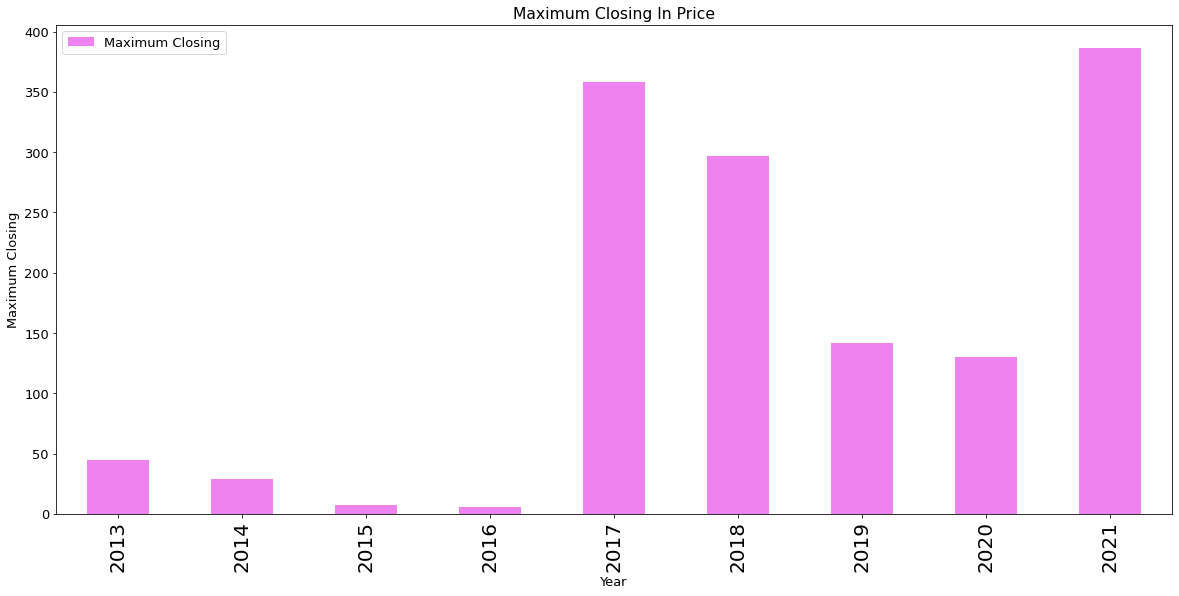

In [20]:
plt.rc('xtick', labelsize=20) 
plotdata = pd.DataFrame({"Date": df["Date"].dt.year,"Maximum Closing":df["Close"]})
plotdata.groupby("Date").max("Maximum Closing").plot(kind="bar",figsize=(20, 9),color='violet', title="Maximum Closing In Price")
plt.xlabel("Year")
plt.ylabel("Maximum Closing")

# Comparative Study Between Coins

In [169]:
Litecoin = pd.read_csv("Litecoin.csv",index_col=0)
Bitcoin = pd.read_csv("Bitcoin.csv",index_col=0)
Dogecoin = pd.read_csv("Dogecoin.csv",index_col=0)
Ethereumcoin = pd.read_csv("Ethereum.csv",index_col=0)

In [170]:
Litecoin=Litecoin[::-1].reset_index(drop=True)
Bitcoin=Bitcoin[::-1].reset_index(drop=True)
Dogecoin=Dogecoin[::-1].reset_index(drop=True)
Ethereumcoin=Ethereumcoin[::-1].reset_index(drop=True)
Bitcoin

,Date,Open,High,Low,Close,Volume,Market Cap
0,Apr 28 2013,135.30,135.98,132.10,134.21,0,1488566728
1,Apr 29 2013,134.44,147.49,134.00,144.54,0,1603768865
2,Apr 30 2013,144.00,146.93,134.05,139.00,0,1542813125
3,May 01 2013,139.00,139.89,107.72,116.99,0,1298954594
4,May 02 2013,116.38,125.60,92.28,105.21,0,1168517495
...,...,...,...,...,...,...,...
2950,May 26 2021,38392.62,40782.08,37905.83,39294.20,51346735160,735556411166
2951,May 27 2021,39316.89,40379.62,37247.90,38436.97,43210968721,719538129128
2952,May 28 2021,38507.08,38856.97,34779.04,35697.61,55200191952,668283930067
2953,May 29 2021,35684.16,37234.50,33693.93,34616.07,45231013335,648061013208


In [171]:
# Feature scaling is done by min max normalization of data
scaler = MinMaxScaler()
# fit using the train set

scaler.fit(np.expand_dims(Litecoin['Close'],axis=-1))
# transform the test test
Litecoin_scaled = scaler.transform(np.expand_dims (Litecoin['Close'],axis=-1))

scaler.fit(np.expand_dims( Bitcoin['Close'],axis=-1))
# # transform the test test
Bitcoin_scaled = scaler.transform(np.expand_dims( Bitcoin['Close'],axis=-1))

scaler.fit(np.expand_dims( Dogecoin['Close'],axis=-1))
# # transform the test test
Dogecoin_scaled = scaler.transform( np.expand_dims( Dogecoin['Close'],axis=-1))

scaler.fit( np.expand_dims( Ethereumcoin['Close'],axis=-1))
# # transform the test test
Ethereumcoin_scaled = scaler.transform( np.expand_dims( Ethereumcoin['Close'],axis=-1))

In [172]:
Litecoin['Date'] = pd.to_datetime(Litecoin['Date'])
Bitcoin['Date'] = pd.to_datetime(Bitcoin['Date'])
Dogecoin['Date'] = pd.to_datetime(Dogecoin['Date'])
Ethereumcoin['Date'] = pd.to_datetime(Ethereumcoin['Date'])

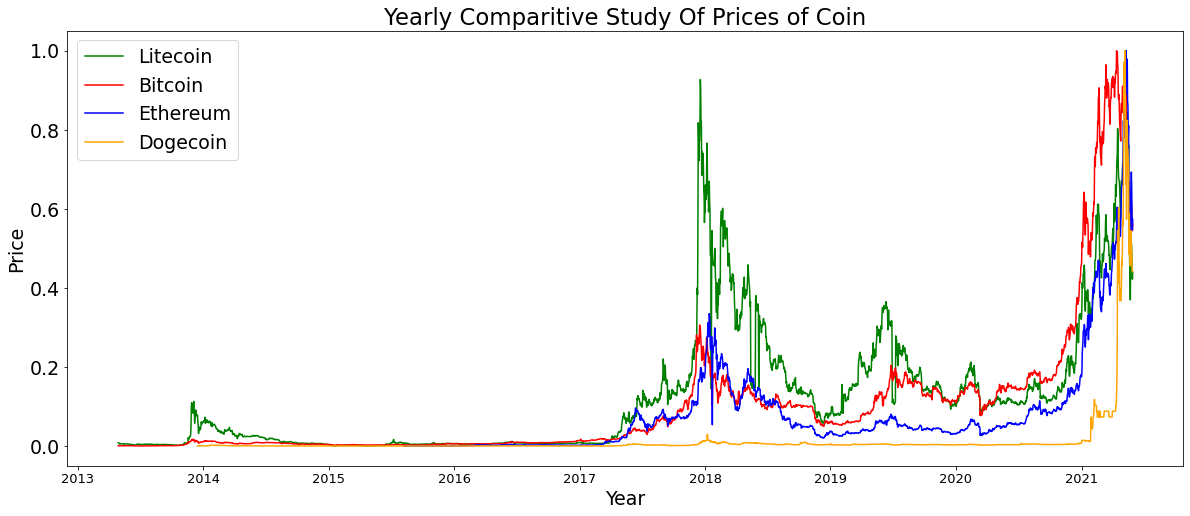

In [173]:
font = {
        'size'   : 19}

plt.rc('font', **font)

plt.rc('xtick', labelsize=13) 

plt.figure(figsize=(20,8)) 

Litecoin=Litecoin.sort_values(by=["Date"])
Bitcoin=Bitcoin.sort_values(by=["Date"])
Dogecoin=Dogecoin.sort_values(by=["Date"])
Ethereumcoin=Ethereumcoin.sort_values(by=["Date"])

plt.title("Yearly Comparitive Study Of Prices of Coin")
plt.plot(Litecoin["Date"].values,Litecoin_scaled ,color = 'green', label = 'Litecoin')
plt.plot(Bitcoin["Date"].values, Bitcoin_scaled,color = 'red', label = 'Bitcoin')
plt.plot(Ethereumcoin["Date"].values, Ethereumcoin_scaled,color = 'blue', label = 'Ethereum')
plt.plot(Dogecoin["Date"].values, Dogecoin_scaled,color = 'orange', label = 'Dogecoin')
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(loc = 'upper left')
plt.show()

# Model Training

In [174]:
X_train=[]
Y_train=[]

In [175]:
Litecoin

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,4.30,4.40,4.18,4.35,0,74636938
1,2013-04-29,4.37,4.57,4.23,4.38,0,75388964
2,2013-04-30,4.40,4.57,4.17,4.30,0,74020918
3,2013-05-01,4.29,4.36,3.52,3.80,0,65604596
4,2013-05-02,3.78,4.04,3.01,3.37,0,58287979
...,...,...,...,...,...,...,...
2950,2021-05-26,183.98,204.09,180.02,199.22,4409113332,13298705180
2951,2021-05-27,199.24,208.46,181.09,193.12,4104509375,12891299486
2952,2021-05-28,193.99,198.49,166.20,177.32,4842770593,11836582264
2953,2021-05-29,177.38,188.61,158.04,163.81,4442221955,10934586487


In [176]:
data_training = Litecoin[Litecoin['Date']< '2021-01-31'].copy()
data_test = Litecoin[Litecoin['Date']>= '2021-01-31'].copy()

In [177]:
Data=data_training[["High","Low","Open","Close","Volume"]]

In [178]:
len(data_test)

120

In [179]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(Data)
training_data

array([[0.00818291, 0.00917623, 0.00879937, 0.00893107, 0.        ],
       [0.00863752, 0.00932568, 0.00899492, 0.00901506, 0.        ],
       [0.00863752, 0.00914634, 0.00907872, 0.00879109, 0.        ],
       ...,
       [0.35954005, 0.35996533, 0.34021454, 0.37048547, 0.3238941 ],
       [0.38406204, 0.39170851, 0.38289849, 0.37474103, 0.49342904],
       [0.3598342 , 0.38202415, 0.37390357, 0.3702335 , 0.3519117 ]])

In [180]:
training_data.shape[0]

2835

In [181]:
X_train=[]
Y_train=[]

In [182]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [183]:
X_train.shape,Y_train.shape

((2775, 60, 5), (2775,))

## Applying GRU

In [198]:
model = Sequential() 
model.add(GRU(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(GRU(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(GRU(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(GRU(units = 120, activation = 'relu', return_sequences = True))
model.add(Dropout(0.5))
model.add(GRU(units = 120, activation = 'relu', return_sequences = True))
model.add(Dropout(0.5))
model.add(Dense(units =1))
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_89 (GRU)                 (None, 60, 50)            8550      
_________________________________________________________________
dropout_89 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
gru_90 (GRU)                 (None, 60, 60)            20160     
_________________________________________________________________
dropout_90 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
gru_91 (GRU)                 (None, 60, 80)            34080     
_________________________________________________________________
dropout_91 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
gru_92 (GRU)                 (None, 60, 120)         

In [149]:
model.compile( optimizer  =  'adam' , loss  =  'mean_squared_error' )
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50 , validation_split=0.1 )

Epoch 1/20
50/50 [==============================] - 7s 138ms/step - loss: 0.0017 - val_loss: 9.9031e-04
Epoch 2/20
50/50 [==============================] - 7s 139ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 3/20
50/50 [==============================] - 8s 155ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 4/20
50/50 [==============================] - 7s 138ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/20
50/50 [==============================] - 7s 139ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 6/20
50/50 [==============================] - 7s 139ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 7/20
50/50 [==============================] - 7s 149ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 8/20
50/50 [==============================] - 8s 168ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 9/20
50/50 [==============================] - 7s 143ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 10/20
50/50 [==============================] - 7s 141ms/step - loss: 0.0013 - val_loss: 0.

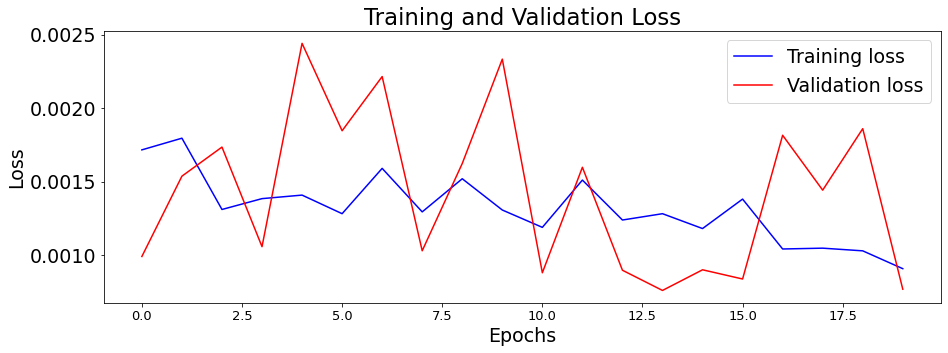

In [150]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=(15,5))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [151]:
part_60_days = data_test
df=part_60_days
df = df[["High","Low","Open","Close","Volume"]]
df.head()

,High,Low,Open,Close,Volume
2835,134.70,126.25,133.42,129.57,4539387378
2836,136.13,126.35,129.57,131.95,5607159828
2837,145.53,131.95,131.95,142.51,7552216052
2838,155.89,142.17,142.48,155.61,8586975076
2839,158.09,142.41,155.66,145.15,7811659280


In [152]:
inputs = scaler.transform(df)

In [153]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
#     print(inputs)
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test) 
# X_test.shape, Y_test.shape
Y_pred = model.predict(X_test) 
# Y_pred, Y_test
# scaler.scale_

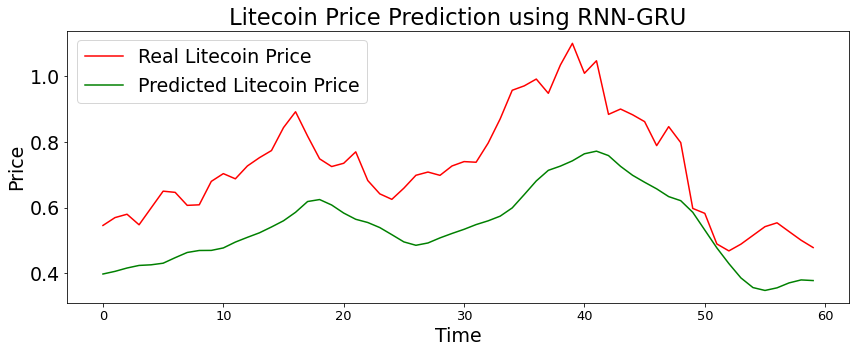

In [142]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Litecoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Litecoin Price')
plt.title('Litecoin Price Prediction using RNN-GRU')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Applying LSTM

In [157]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_25 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_26 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_27 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

In [159]:
model.compile( optimizer  =  'adam' , loss  =  'mean_squared_error' )
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50 , validation_split=0.1 )

Epoch 1/20
50/50 [==============================] - 10s 209ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 2/20
50/50 [==============================] - 11s 218ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 3/20
50/50 [==============================] - 11s 229ms/step - loss: 0.0026 - val_loss: 7.2006e-04
Epoch 4/20
50/50 [==============================] - 11s 211ms/step - loss: 0.0024 - val_loss: 7.9695e-04
Epoch 5/20
50/50 [==============================] - 11s 221ms/step - loss: 0.0022 - val_loss: 8.0059e-04
Epoch 6/20
50/50 [==============================] - 11s 221ms/step - loss: 0.0022 - val_loss: 7.0931e-04
Epoch 7/20
50/50 [==============================] - 10s 208ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/20
50/50 [==============================] - 10s 209ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 9/20
50/50 [==============================] - 10s 207ms/step - loss: 0.0017 - val_loss: 9.0924e-04
Epoch 10/20
50/50 [==============================] - 10s 208ms/step - l

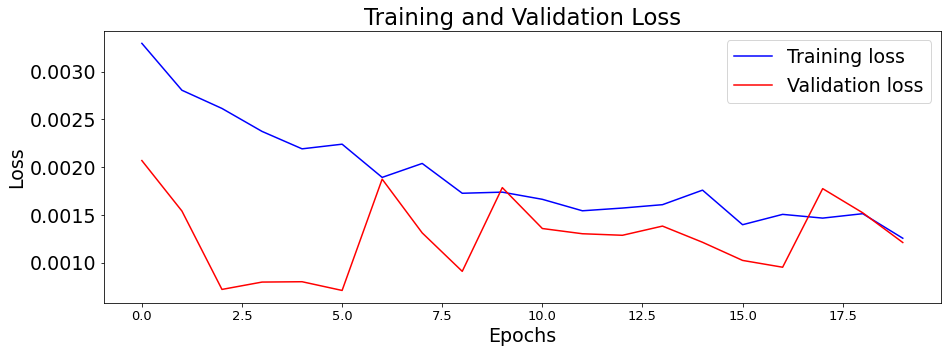

In [160]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=(15,5))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [161]:
part_60_days = data_test
df=part_60_days
df = df[["High","Low","Open","Close","Volume"]]
df.head()

,High,Low,Open,Close,Volume
2835,134.70,126.25,133.42,129.57,4539387378
2836,136.13,126.35,129.57,131.95,5607159828
2837,145.53,131.95,131.95,142.51,7552216052
2838,155.89,142.17,142.48,155.61,8586975076
2839,158.09,142.41,155.66,145.15,7811659280


In [162]:
inputs = scaler.transform(df)

In [163]:
inputs.shape

(120, 5)

In [164]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
#     print(inputs)
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test) 
# X_test.shape, Y_test.shape
Y_pred = model.predict(X_test) 
# Y_pred, Y_test
# scaler.scale_

In [165]:
X_test.shape

(60, 60, 5)

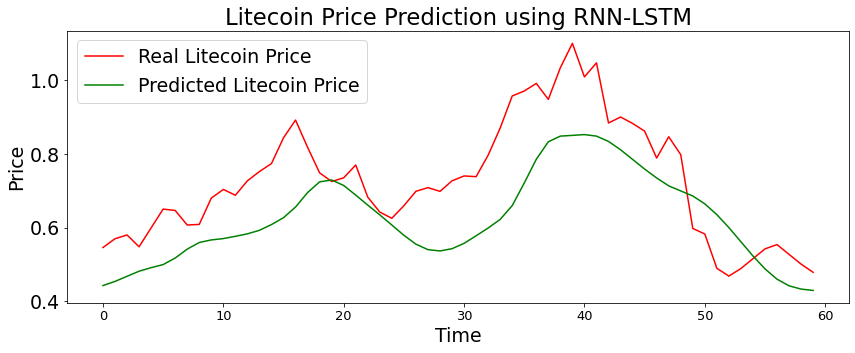

In [167]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Litecoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Litecoin Price')
plt.title('Litecoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()